<a href="https://colab.research.google.com/github/rlaqhalx/machine_learning_study/blob/main/CNN_Deep_learning_image_classification_for_Sign_Language_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sign Language MNIST Image Classfication using CNN


# Downloading Dataset
English alphabet sign language dataset

https://www.kaggle.com/datamunge/sign-language-mnist

In [2]:
!kaggle datasets download -d datamunge/sign-language-mnist

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amer_sign2.png          
replace amer_sign3.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amer_sign3.png          
replace american_sign_language.PNG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: american_sign_language.PNG  
replace sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test.csv     
replace sign_mnist_test/sign_mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_test/sign_mnist_test.csv  
replace sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_train.csv    
replace sign_mnist_train/sign_mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sign_mnist_train/sign_mnist_train.csv  


# Importing Libaray

* Conv2D -> Convolution layer
* MaxPooling2D -> subsampling
* Flatten -> 2D feature map to 1D for dense layer
* Dropout to avoid overfitting


* ImageDataGenerator -> Image augmentation






In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Loading dataset
Train & Test set

In [5]:
train_df = pd.read_csv('sign_mnist_train.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
test_df = pd.read_csv('sign_mnist_test.csv')

test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


# Label Distribution
- Exclude 9=J and 25=Z because they involve actions.
- There are a total of 24 labels.

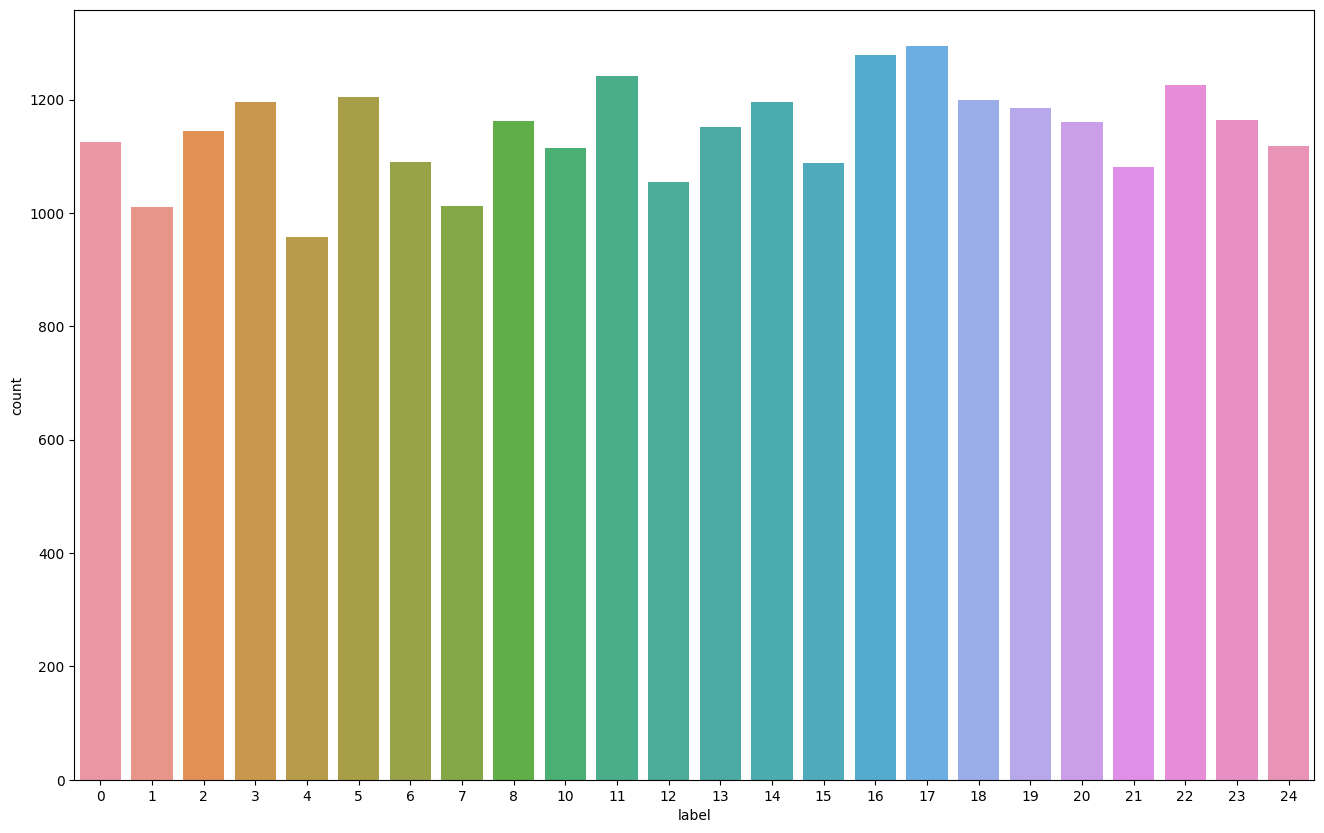

In [10]:
plt.figure(figsize=(16, 10))
sns.countplot(x='label', data=train_df)
plt.show()

# Data preprocessing

## Divide dataset into x (input) & y (output)

- converted size of x data to (28, 28, 1)

The reason for this reshaping is because CNNs are designed to work with image data. They expect input data to have a specific structure - (Batch Size, Height, Width, Channels). This structure is crucial for the CNN to apply convolutional filters effectively.

In summary, you need 2D for convolution calculation so input should be 3D!


1. -1 (Batch Size): This is a placeholder for an unknown number of samples in the dataset. By using -1, you're telling numpy to automatically calculate the necessary batch size that will fit the data.

2. 28 (Height): Each image in the MNIST dataset is 28 pixels in height.

3. 28 (Width): Each image in the MNIST dataset is 28 pixels in width.

4. 1 (Channels): In this case, the images are grayscale, so there is only one color channel. For RGB images, you would have 3 channels (Red, Green, Blue)

In [11]:
train_df = train_df.astype(np.float32)
x_train = train_df.drop(columns=['label'], axis=1).values
x_train = x_train.reshape((-1, 28, 28, 1))
y_train = train_df[['label']].values

test_df = test_df.astype(np.float32)
x_test = test_df.drop(columns=['label'], axis=1).values
x_test = x_test.reshape((-1, 28, 28, 1))
y_test = test_df[['label']].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(27455, 28, 28, 1) (27455, 1)
(7172, 28, 28, 1) (7172, 1)


## Preview of data

By reshaping to (28,28), Change the format to image format to show

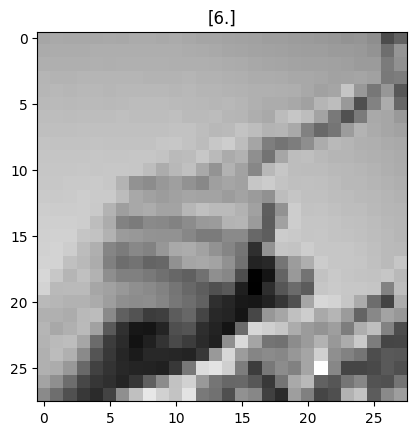

In [12]:
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28, 28)), cmap='gray')
plt.show()

## One-hot encoding

After one-hot encoding for y-value, it becomes 24 from 1

(27455, 1) -> (27455, 24)
(7172, 1) -> (7172, 24)

In [13]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

print(y_train.shape)

(27455, 24)


## Normalization
Image data consists of pixels represented as integers ranging from 0 to 255 (unsigned integer 8-bit = uint8). I'll divide this by 255 to convert it into floating-point data ranging from 0 to 1 (floating point 32-bit = float32) and normalize it.

Normalization for input (x value)





> ImageDataGenerator


Instead of directly dividing it by 255, I used ImageDataGenerator() to normalize. 1/255 will be multiplied to each pixel. The pixel values are transformed from the range [0, 255] to [0, 1].

Train_image_datagen is an instance of ImageDataGenerator. This class generates batches of augmented/normalized data from a set of images.




> flow

1. train_datagen is the generator that will produce batches of augmented or normalized data during training.

2. x=x_train specifies the input data (in this case, images) for the generator. y=y_train specifies the corresponding labels for the input data.

3. batch_size=256 sets the number of samples in each batch that the generator will yield. In each iteration, the generator will provide a batch of 256 images and their corresponding labels.

4. shuffle=True indicates that the data will be shuffled after each epoch. This is important for ensuring that the model doesn't learn any spurious patterns based on the order of the data.


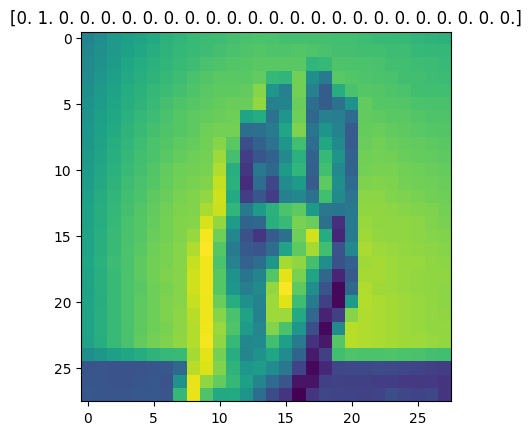

In [14]:
train_image_datagen = ImageDataGenerator(
  rescale=1./255, # 일반화
)

train_datagen = train_image_datagen.flow(
    x=x_train,
    y=y_train,
    batch_size=256,
    shuffle=True
)

test_image_datagen = ImageDataGenerator(
  rescale=1./255
)

test_datagen = test_image_datagen.flow(
    x=x_test,
    y=y_test,
    batch_size=256,
    shuffle=False
)

index = 1

# selects a specific image from the first batch
preview_img = train_datagen.__getitem__(0)[0][index]
preview_label = train_datagen.__getitem__(0)[1][index]

plt.imshow(preview_img.reshape((28, 28)))
plt.title(str(preview_label))
plt.show()

# Network Architecture

```
input = Input(shape=(28, 28, 1))
```

The input shape is specified as (28, 28, 1), which means each input sample is a 2D grid of 28x28 pixels with a single color channel (grayscale).


```
hidden = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)
```


These lines define a series of convolutional and max pooling layers. Convolutional layers apply filters to detect patterns in the input data. Max pooling layers downsample the spatial dimensions

Hidden layers:

* Conv2D is a 2D convolutional layer. It applies a specified number of filters to the input data.

* filters=32: the number of filters in the layer. Each filter learns to recognize different patterns or features in the input.

* kernel_size=3: the size of the filters. 3x3 grid of pixels at a time.

strides=1: how the filter "steps" across the input image.

padding='same': dimension of output = input.

activation='relu': activation functions in hidden layers of neural networks

Max Pooling Layers:
Reduces the spatial dimensions of the feature maps

* pool_size=2: the size of the pooling window (2x2)

strides=2: the step size of the pooling operation.

*The convolutional layers learn to recognize different features in the images, and the max pooling layers downsample the spatial dimensions, reducing the number of parameters and computational complexity.*

```
hidden = Flatten()(hidden)
```

This flattens the output from the previous layers into a 1D array. This is necessary before transitioning to fully connected layers.


```
hidden = Dense(512, activation='relu')(hidden)
```
Fully connected layer

```
hidden = Dropout(rate=0.3)(hidden)
```
Dropout layer:  drop 30% of data to help prevent overfitting

```
output = Dense(24, activation='softmax')(hidden)
```
Output layer with 24 units and a softmax activation function, which outputs probabilities for each class.



In [15]:
input = Input(shape=(28, 28, 1))

hidden = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Flatten()(hidden)

hidden = Dense(512, activation='relu')(hidden)

hidden = Dropout(rate=0.3)(hidden)

output = Dense(24, activation='softmax')(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464 

# Training model

Instead of below

```
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=20
)
```
Used train_datagen and test_datagen (ImageDataGenerator instances that perform data augmentation & normalization)

model.fit() with the generators instead of providing the raw arrays allows you to apply data augmentation and normalization on-the-fly as the data is fed into the model.

memory-efficient and useful when working with large datasets



In [16]:
history = model.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=20
)

Epoch 1/20
108/108 [==============================] - 15s 21ms/step - loss: 2.1872 - acc: 0.3462 - val_loss: 1.0631 - val_acc: 0.6606
Epoch 2/20
108/108 [==============================] - 2s 17ms/step - loss: 0.5690 - acc: 0.8154 - val_loss: 0.4219 - val_acc: 0.8674
Epoch 3/20
108/108 [==============================] - 2s 17ms/step - loss: 0.1926 - acc: 0.9408 - val_loss: 0.2793 - val_acc: 0.9038
Epoch 4/20
108/108 [==============================] - 2s 18ms/step - loss: 0.0874 - acc: 0.9756 - val_loss: 0.2283 - val_acc: 0.9198
Epoch 5/20
108/108 [==============================] - 3s 24ms/step - loss: 0.0385 - acc: 0.9915 - val_loss: 0.2029 - val_acc: 0.9428
Epoch 6/20
108/108 [==============================] - 2s 18ms/step - loss: 0.0229 - acc: 0.9958 - val_loss: 0.2158 - val_acc: 0.9354
Epoch 7/20
108/108 [==============================] - 2s 17ms/step - loss: 0.0152 - acc: 0.9969 - val_loss: 0.2141 - val_acc: 0.9388
Epoch 8/20
108/108 [==============================] - 2s 17ms/step -

# Training Result Graph

Text(0, 0.5, 'Loss')

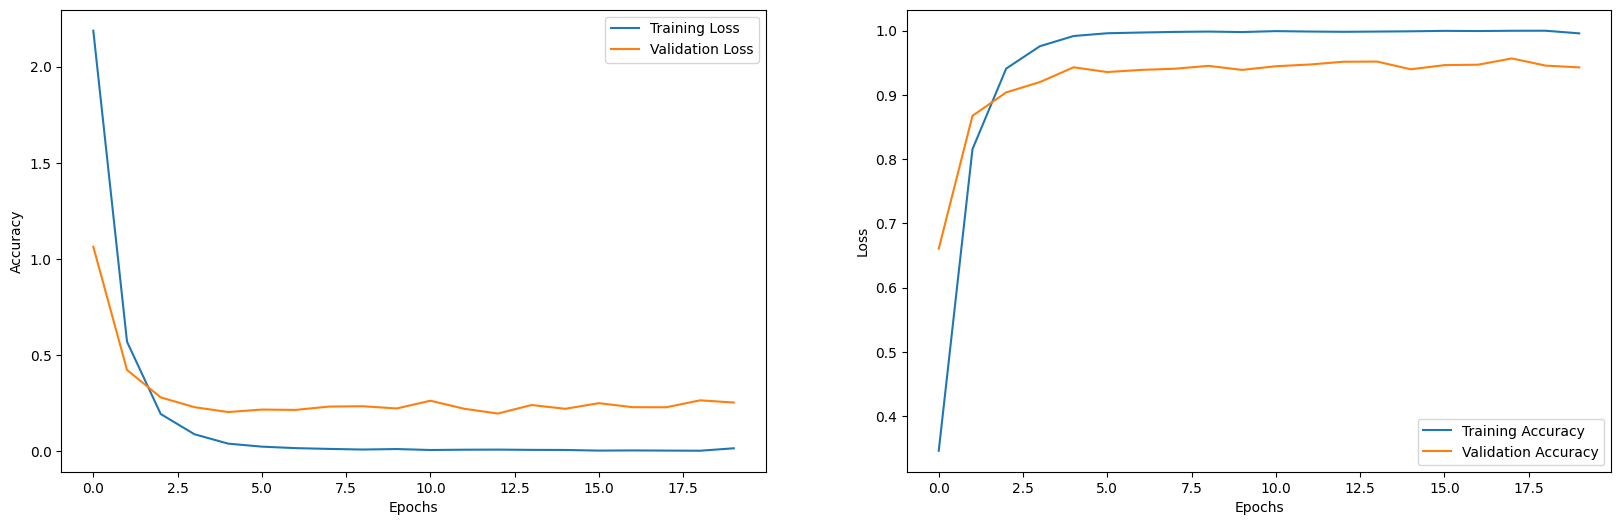

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')

axes[0].legend()
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')

axes[1].plot(history.history['acc'], label='Training Accuracy')
axes[1].plot(history.history['val_acc'], label='Validation Accuracy')

axes[1].legend()

axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')

# Image Augmentation

ImageDataGenerator instances perform data augmentation and normalization. The flow() method generates batches of normalized and augmented data.

Data augmentation helps to prevent overfitting and improve the model's generalization capabilities.

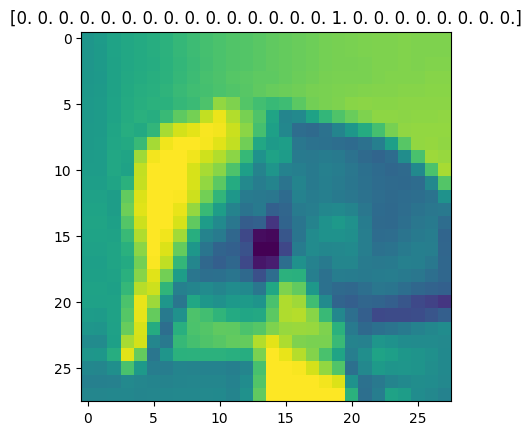

In [20]:
train_image_datagen = ImageDataGenerator(
  rescale=1./255, # Normalization
  rotation_range=10,  # Randomly rotate images (in degrees, 0-180)
  zoom_range=0.1,      # Randomly zoom in on images (by a percentage)
  width_shift_range=0.1,   # Randomly shift images horizontally (by a percentage)
  height_shift_range=0.1   # Randomly shift images vertically (by a percentage)
)

train_datagen = train_image_datagen.flow(
    x=x_train,
    y=y_train,
    batch_size=256,
    shuffle=True
)

test_image_datagen = ImageDataGenerator(
  rescale=1./255
)

test_datagen = test_image_datagen.flow(
    x=x_test,
    y=y_test,
    batch_size=256,
    shuffle=False
)

index = 1

preview_img = train_datagen.__getitem__(0)[0][index]
preview_label = train_datagen.__getitem__(0)[1][index]

plt.imshow(preview_img.reshape((28, 28)))
plt.title(str(preview_label))
plt.show()

In [21]:
input = Input(shape=(28, 28, 1))

hidden = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Flatten()(hidden)

hidden = Dense(512, activation='relu')(hidden)

hidden = Dropout(rate=0.3)(hidden)

output = Dense(24, activation='softmax')(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          1846

In [22]:
history = model.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=20
)

Epoch 1/20
108/108 [==============================] - 12s 92ms/step - loss: 2.6113 - acc: 0.2111 - val_loss: 1.4124 - val_acc: 0.6115
Epoch 2/20
108/108 [==============================] - 10s 91ms/step - loss: 1.2544 - acc: 0.5973 - val_loss: 0.6863 - val_acc: 0.7620
Epoch 3/20
108/108 [==============================] - 10s 91ms/step - loss: 0.7504 - acc: 0.7483 - val_loss: 0.3546 - val_acc: 0.8858
Epoch 4/20
108/108 [==============================] - 9s 84ms/step - loss: 0.5116 - acc: 0.8295 - val_loss: 0.2521 - val_acc: 0.9235
Epoch 5/20
108/108 [==============================] - 9s 84ms/step - loss: 0.3925 - acc: 0.8707 - val_loss: 0.1750 - val_acc: 0.9427
Epoch 6/20
108/108 [==============================] - 10s 90ms/step - loss: 0.2838 - acc: 0.9054 - val_loss: 0.1082 - val_acc: 0.9692
Epoch 7/20
108/108 [==============================] - 10s 89ms/step - loss: 0.2460 - acc: 0.9176 - val_loss: 0.1210 - val_acc: 0.9583
Epoch 8/20
108/108 [==============================] - 11s 100ms/

Text(0, 0.5, 'Loss')

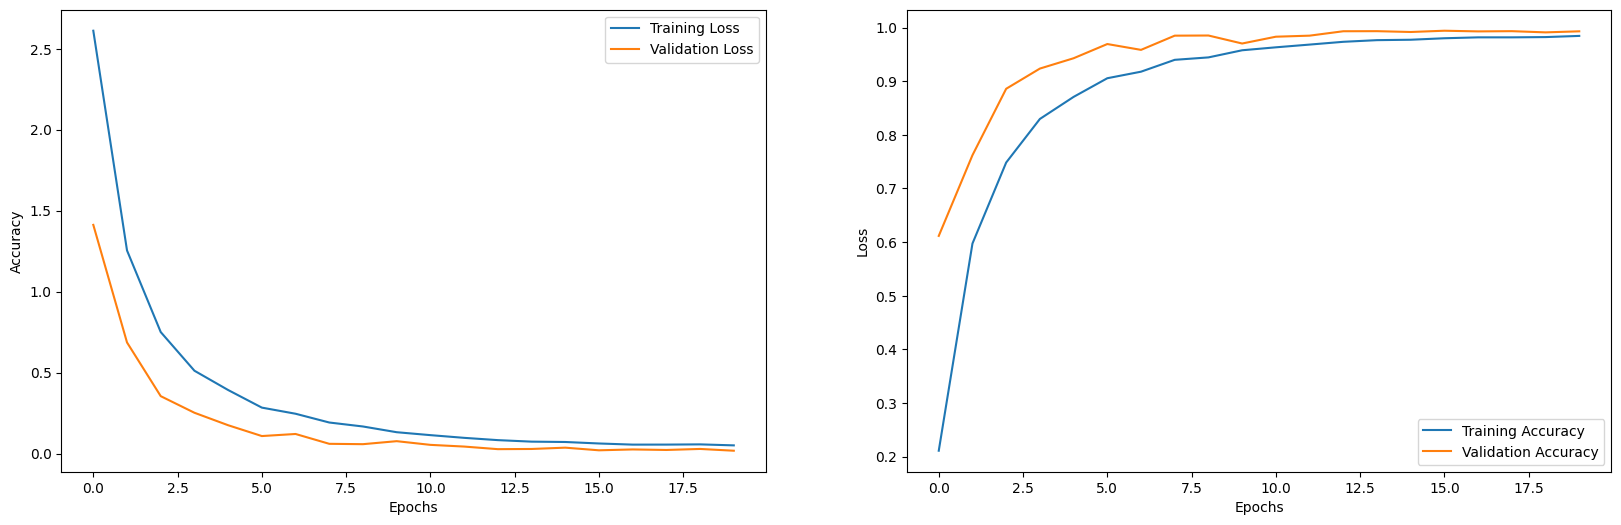

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')

axes[0].legend()
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')

axes[1].plot(history.history['acc'], label='Training Accuracy')
axes[1].plot(history.history['val_acc'], label='Validation Accuracy')

axes[1].legend()

axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')